In [1]:
# Load data
import pytreebank
import sys
import os

out_path = os.path.join(sys.path[0], 'sst_{}.txt')
dataset = pytreebank.load_sst('raw_data\\trees')

# Store train, dev and test in separate files
for category in ['train', 'test', 'dev']:
    with open(out_path.format(category), 'w') as outfile:
        for item in dataset[category]:
            outfile.write("__label__{}\t{}\n".format(
                item.to_labeled_lines()[0][0] + 1,
                item.to_labeled_lines()[0][1]
            ))
# Print the length of the training set
print(len(dataset['train']))

8544


In [6]:
import pandas as pd
# Read train data
df = pd.read_csv('sst_test.txt', sep='\t', header=None, names=['truth', 'text'])
df['truth'] = df['truth'].str.replace('__label__', '')
df['truth'] = df['truth'].astype(int).astype('category')
df.head()

,truth,text
0,3,Effective but too-tepid biopic
1,4,If you sometimes like to go to the movies to h...
2,5,"Emerges as something rare , an issue movie tha..."
3,3,The film provides some great insight into the ...
4,5,Offers that rare combination of entertainment ...


Text(0, 0.5, 'Label')

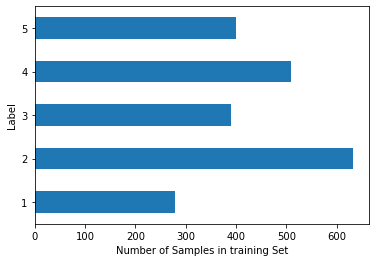

In [7]:
import matplotlib.pyplot as plt
ax = df['truth'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")

In [8]:
df['len'] = df['text'].str.len()  # Store string length of each sample
df = df.sort_values(['len'], ascending=True)
df.head(20)

,truth,text,len
558,3,Hmm .,5
879,2,No. .,5
543,3,Hopkins .,9
1086,2,No more .,9
881,3,You bet .,9
2100,3,Brimful .,9
1219,3,Big deal !,10
266,3,It is now .,11
1668,1,Ridiculous .,12
1752,2,Moot point .,12
